# New York Taxi Fare Predictions usnin Keras

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error

df= pd.read_csv('../../dataSets/NYTaxiFarePredictionWithNN/NYC_taxi.csv', parse_dates=['pickup_datetime'], nrows=500000)

print(df.head())

                             key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3 

In [2]:
%matplotlib inline

# Visualizing Data

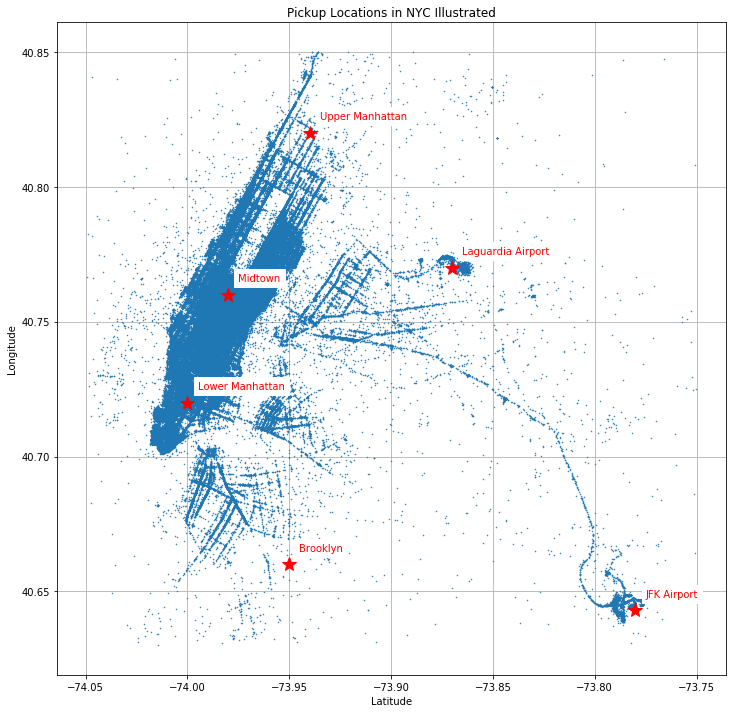

In [3]:
#range of longitud for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

#range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

df2 = df.copy(deep = True)

for long in ['pickup_longitude','dropoff_longitude']:
    df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] < nyc_max_longitude)]
    
for lat in ['pickup_latitude','dropoff_latitude']:
    df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] < nyc_max_latitude)]
    
landmarks = {'JFK Airport':(-73.78,40.643),
            'Laguardia Airport':(-73.87,40.77),
            'Midtown': (-73.98, 40.76),
            'Lower Manhattan': (-74.00, 40.72),
            'Upper Manhattan': (-73.94, 40.82),
            'Brooklyn': (-73.95, 40.66)}

import matplotlib.pyplot as plt

def plot_lat_long(df, landmarks, points='Pickup'):
    plt.figure(figsize=(12,12))
    if points == 'Pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), '.', markersize=1)
        
    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], '*', markersize=15, alpha=1, color='r')
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, landmarks[landmark][1]+0.005), color='r', backgroundcolor='w')
    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

plot_lat_long(df2, landmarks, points='Pickup')
    

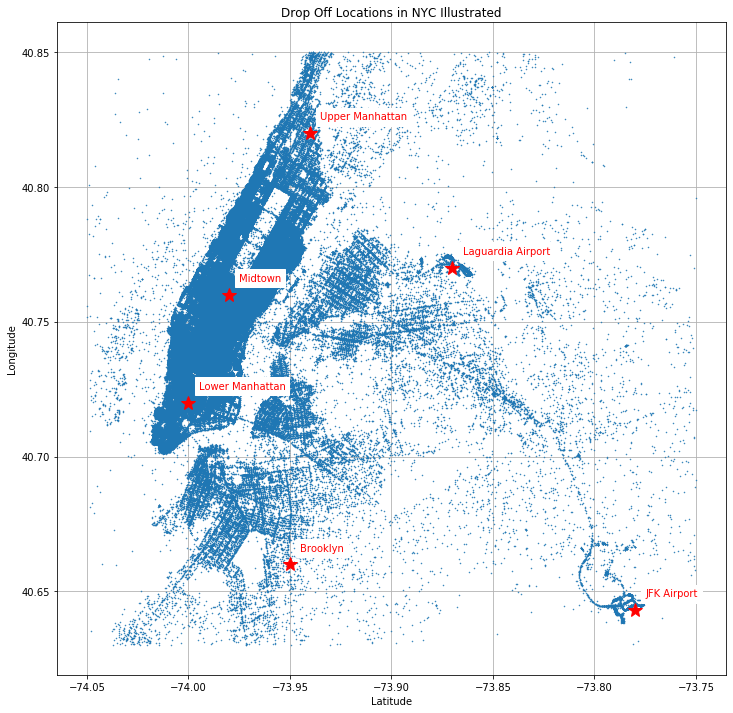

In [4]:
plot_lat_long(df2, landmarks, points='Drop Off')

# Ridership by day and hour

In [5]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

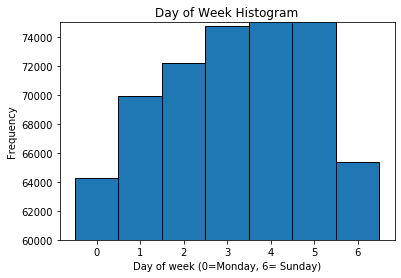

In [6]:
import numpy as np

df['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black', ylim=(60000,75000))
plt.xlabel('Day of week (0=Monday, 6= Sunday)')
plt.title('Day of Week Histogram')
plt.show()

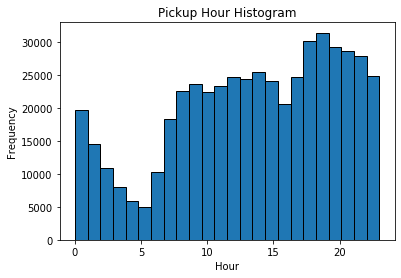

In [7]:
df['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Histogram')
plt.xlabel('Hour')
plt.show()

## Data Preprocessing 

In [8]:
print(df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64


In [9]:
#Drop missing values
df = df.dropna()
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
day_of_week          0
hour                 0
dtype: int64

In [10]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445,2011.739129,6.268617,15.684239,3.042020,13.510843
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391,1.860897,3.437798,8.681092,1.949243,6.511596
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


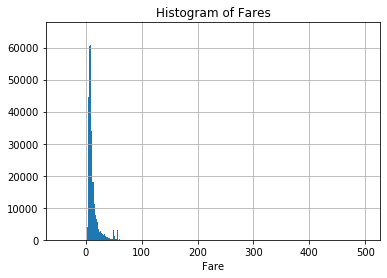

In [11]:
df['fare_amount'].hist(bins=500)
plt.xlabel("Fare")
plt.title("Histogram of Fares")
plt.show()

In [12]:
df = df[(df['fare_amount'] >= 0) & (df['fare_amount'] <= 100)]

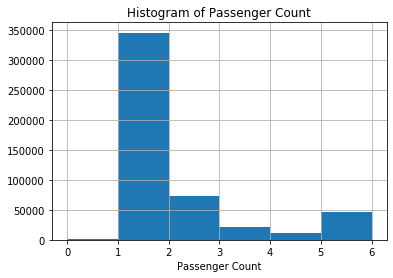

In [13]:
df['passenger_count'].hist(bins=6)
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

C:\Users\hbkmi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  numeric_data[col] = np.asarray(numeric_data[col])


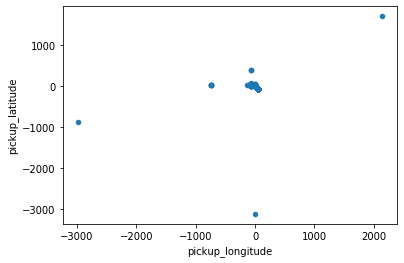

In [14]:
df.plot.scatter('pickup_longitude', 'pickup_latitude')
plt.show()

In [15]:
# only consider locations within NYC
for long in ['pickup_longitude', 'dropoff_longitude']:
    df = df[(df[long] > nyc_min_longitude) & (df[long] <
                                              nyc_max_longitude)]
for lat in ['pickup_latitude', 'dropoff_latitude']:
    df = df[(df[lat] > nyc_min_latitude) & (df[lat] < 
                                            nyc_max_latitude)]

In [16]:
mode = df['passenger_count'].mode().values[0]
df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode
       


In [17]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


## Feature Engineering

In [18]:
df = df.drop(['pickup_datetime'], axis=1)

In [19]:
#Gelocation features (Euclidean Distance)
def euc_distance(lat1, long1, lat2, long2):
    return(((lat1 - lat2) ** 2 + (long1 - long2) **2 ) ** 0.5)

In [20]:
df['distance'] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

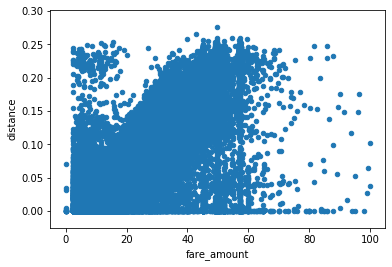

In [21]:
df.plot.scatter('fare_amount', 'distance')
plt.show()

In [22]:
airports = {'JFK_Airport':(-73.78,40.643),
           'Laguardia _Airport':(-73.78,40.77),
           'Newark_Airport':(-74.18,40.69)}

In [23]:
#Calculate pickup and drop off distacnes from major airports
for airport in airports:
    df['pickup_dist_'+airport] = euc_distance(df['pickup_latitude'],df['pickup_longitude'],airports[airport][1], airports[airport][0])
    df['dropoff_dist_'+airport]= euc_distance(df['dropoff_latitude'],df['dropoff_longitude'],airports[airport][1],airports[airport][0])

In [24]:
print(df[['key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 
          'pickup_dist_JFK_Airport',
          'dropoff_dist_JFK_Airport']].head())

                             key  pickup_longitude  pickup_latitude  \
0    2009-06-15 17:26:21.0000001        -73.844311        40.721319   
1    2010-01-05 16:52:16.0000002        -74.016048        40.711303   
2   2011-08-18 00:35:00.00000049        -73.982738        40.761270   
3    2012-04-21 04:30:42.0000001        -73.987130        40.733143   
4  2010-03-09 07:51:00.000000135        -73.968095        40.768008   

   dropoff_longitude  dropoff_latitude  pickup_dist_JFK_Airport  \
0         -73.841610         40.712278                 0.101340   
1         -73.979268         40.782004                 0.245731   
2         -73.991242         40.750562                 0.234714   
3         -73.991567         40.758092                 0.225895   
4         -73.956655         40.783762                 0.225847   

   dropoff_dist_JFK_Airport  
0                  0.092710  
1                  0.242961  
2                  0.237050  
3                  0.240846  
4                  0

In [25]:
df = df.drop(['key'], axis=1)

# Feature Scaling

In [26]:
df_prescaled = df.copy()

In [27]:
df_scaled = df.drop(['fare_amount'], axis=1)
from sklearn.preprocessing import scale
df_scaled = scale(df_scaled)

In [28]:
cols = df.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df.index)
df_scaled = pd.concat([df_scaled, df['fare_amount']],axis=1)
df=df_scaled.copy()

# Model Creation

In [29]:
X = df.loc[:, df.columns != 'fare_amount']
y = df.fare_amount

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [31]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.summary()

Using TensorFlow backend.





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=5)





Epoch 1/5





386750/386750 [==============================] - 12s 32us/step - loss: 13.9829 - mean_squared_error: 13.9829
Epoch 2/5
386750/386750 [==============================] - 12s 31us/step - loss: 12.1666 - mean_squared_error: 12.1666
Epoch 3/5
386750/386750 [==============================] - 12s 30us/step - loss: 11.7839 - mean_squared_error: 11.7839
Epoch 4/5
386750/386750 [==============================] - 12s 30us/step - loss: 11.5660 - mean_squared_error: 11.5660
Epoch 5/5
386750/386750 [==============================] - 12s 30us/step - loss: 11.4344 - mean_squared_error: 11.4344


In [33]:
def predic_random(df_prescaled, X_test, model):
    sample = X_test.sample(n=1, random_state=np.random.randint(low=0, high=10000))
    idx=sample.index[0]
    
    actual_fare = df_prescaled.loc[idx, 'fare_amount']
    day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    day_of_week = day_names[df_prescaled.loc[idx,'day_of_week']]
    hour = df_prescaled.loc[idx,'hour']
    
    predicted_fare = model.predict(sample)[0][0]
    rmse = np.sqrt(np.square(predicted_fare-actual_fare))
    print("Trip Details: {}, {}:00hrs".format(day_of_week, hour))  
    print("Actual fare: ${:0.2f}".format(actual_fare))
    print("Predicted fare: ${:0.2f}".format(predicted_fare))
    print("RMSE: ${:0.2f}".format(rmse))


In [34]:
predic_random(df_prescaled, X_test, model)

Trip Details: Thursday, 21:00hrs
Actual fare: $12.00
Predicted fare: $11.27
RMSE: $0.73


In [35]:
from sklearn.metrics import mean_squared_error
train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))

Train RMSE: 3.32
Test RMSE: 3.32
